In [84]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import Image
import copy
import scipy as stats
import seaborn as sns


In [85]:
# read files from data folder 
CSV_PATH_PALM = os.path.join('..', 'data','palm_oil_production.csv')
CSV_PATH_FOREST = os.path.join('..', 'data','change_forest.csv')
CSV_PATH_LAND = os.path.join('..', 'data','land_use_palm.csv')


In [86]:

COLS_TO_USE = ['Entity', 'Code', 
              'Year', 'Tonnes']

df_palm = pd.read_csv(CSV_PATH_PALM, usecols=COLS_TO_USE)
df_forest = pd.read_csv(CSV_PATH_FOREST)
df_land = pd.read_csv(CSV_PATH_LAND)


In [87]:
# simplify column names of dataframe 
df_forest.rename(columns={"Annual net change in forest area": 
                        "Forest_Change"}, inplace=True)

df_land.rename(columns={"Crops - Oil palm fruit - 254 - Area harvested - 5312 - ha": 
                                "Palm_Land_Use"}, inplace=True)


In [88]:
#Intro image
print("Palm Crop")
Image(url= "../img/palm_life.png", width=600, height=700)

Palm Crop


In [89]:

# data cleaning
# check for null values
df_palm.isnull().sum()
df_forest.isnull().sum()
df_land.isnull().sum()


Entity             0
Code             934
Year               0
Palm_Land_Use      0
dtype: int64

In [90]:

# fill out null values
df1 = df_palm.fillna(value = 'NOT COUNTRY')
df2 = df_forest.fillna(value = 'NOT COUNTRY')
df3 = df_land.fillna(value = 'NOT COUNTRY')

In [91]:


# New dataframes that contain only countries
Code = ['NOT COUNTRY', 'OWID_WRL']

indexNames1 = df1[df1['Code'].isin(Code)].index
df_palm_country = df1.drop(indexNames1)

indexNames2 = df2[df2['Code'].isin(Code)].index
df_forest_country = df2.drop(indexNames2)

indexNames3 = df3[df3['Code'].isin(Code)].index
df_land_countrt = df3.drop(indexNames3)

In [92]:
# drop data before 1970
df_palm_country = df_palm_country[df_palm_country['Year'] >= 1975]  

In [93]:
df_palm_country['Tonnes'].mean()

577647.525848564

In [94]:
df_palm_country['Tonnes'].max()

40567230

In [95]:
# Find the countries produce the most palm oil
df_palm_country_top = df_palm_country[df_palm_country['Tonnes'] 
                                        > df_palm_country['Tonnes'].mean()]
Top_Production_Country = df_palm_country_top.Entity.unique()
Top_Production_Country

array(['Colombia', 'Ecuador', 'Guatemala', 'Honduras', 'Indonesia',
       'Malaysia', 'Melanesia', 'Nigeria', 'Papua New Guinea', 'Thailand'],
      dtype=object)

In [96]:
print("The following list of countries " 
    "are the top 10 producers of palm oil in the world:\n" )
print (Top_Production_Country)

The following list of countries are the top 10 producers of palm oil in the world:

['Colombia' 'Ecuador' 'Guatemala' 'Honduras' 'Indonesia' 'Malaysia'
 'Melanesia' 'Nigeria' 'Papua New Guinea' 'Thailand']


In [97]:
print("Indonesia")
Image(url= "../img/indo.png", width=500, height=700)

print("In the past two decades, more than 25 million hectares of tree cover has been lost", 
      "much of it logged or burned to plant oil palms.")

Indonesia
In the past two decades, more than 25 million hectares of tree cover has been lost much of it logged or burned to plant oil palms.


In [98]:


print( " Worse still, Indonesia is the world’s biggest exporter of global warming⁠—power station coal.")

 Worse still, Indonesia is the world’s biggest exporter of global warming⁠—power station coal.


In [99]:
Image(url= "../img/forest.png", width=500, height=700)

In [100]:
Image(url= "../img/borneo.gif", width=700, height=500)

In [64]:
#print("The countries that produce the most palm oil are:\n")
#i= 1
#for country in Top_Production_Country:
#    print(i, ". ", country)
#    i += 1

In [65]:
# entity_counts = df_palm_countrty['Entity'].value_counts()
# s = entity_counts[entity_counts > entity_counts.mean()]

# s

<AxesSubplot:xlabel='Year'>

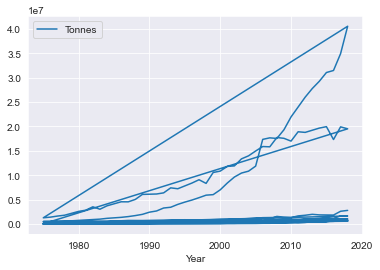

In [66]:
df_palm_country.loc[df_palm_country['Entity'].isin(Top_Production_Country), :].plot(x='Year',legend=True)

In [67]:
combined_sorted = df_palm_country.sort_values(by="Tonnes", ascending=False)



In [68]:
combined_sorted.set_index("Entity", inplace=True)
ranking = combined_sorted.head(15)

In [69]:
df_palm_plot = df_palm_country.loc[df_palm_country['Entity'].isin(Top_Production_Country), :]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


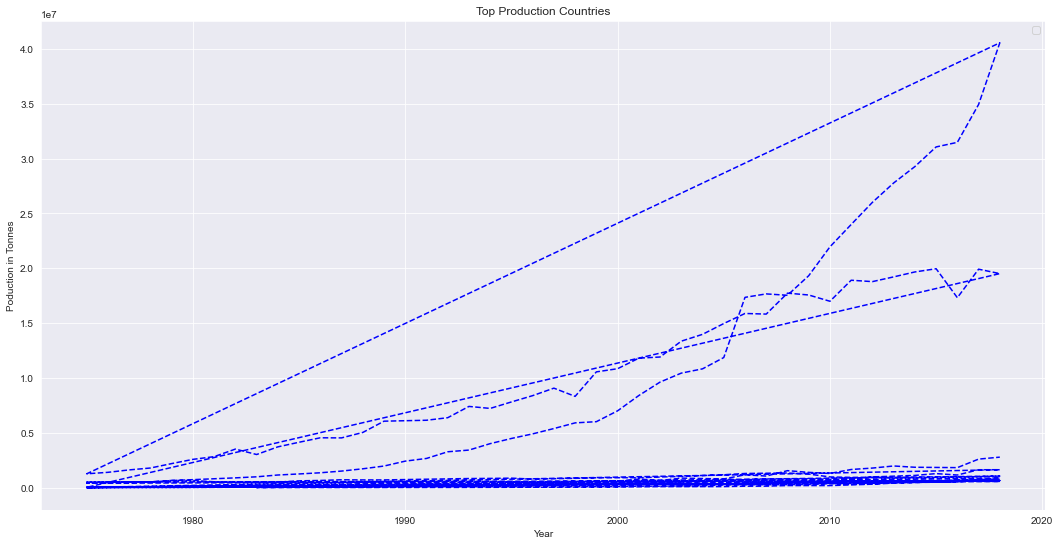

In [70]:

fig, axes = plt.subplots(figsize=(18,9))

axes.set_title('Top Production Countries')

axes.set_xlabel('Year')
axes.set_ylabel('Poduction in Tonnes')

axes.plot((df_palm_plot['Year']),df_palm_plot['Tonnes'] , 'b--')
#axes.plot((df4['Year']),df4['Tonnes'], '--c', label = s.index[1] )
#axes.plot((df5['Year']),df5['Tonnes'], ':r' , label = s.index[-6] )

axes.legend()

In [71]:
dict_of_df_palm = {}
for country in Top_Production_Country:

    key_name = 'df_plot_'+str(country)    

    dict_of_df_palm[key_name] = copy.deepcopy(
        df_palm_country.loc[df_palm_country['Entity']==country])
 



In [73]:
sns.set_style('whitegrid')
# for df in dict_of_df:
 #   print( dict_of_df[df] )

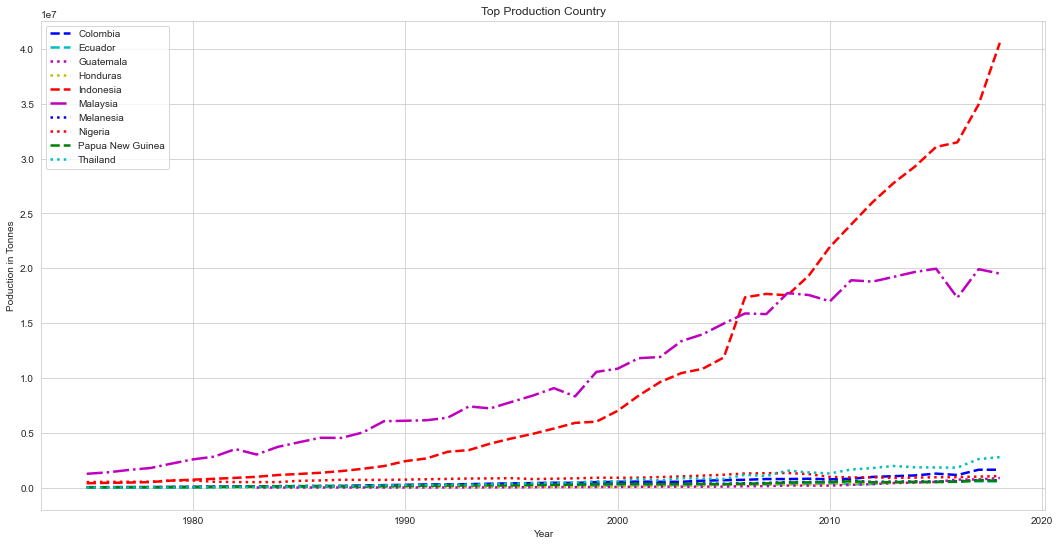

In [74]:
# iterate through the dataframe dictionary to plot
ls_of_style = ['b--', '--c', ':m', ':y', '--r',
                 '-.m', ':b', ':r', '--g', ':c']
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(18,9))
axes.set_title('Top Production Country')
axes.set_xlabel('Year')
axes.set_ylabel('Poduction in Tonnes')
axes.set
i = 0
for df in dict_of_df_palm:
    axes.plot((dict_of_df_palm[df]['Year']),dict_of_df_palm[df]['Tonnes'] , ls_of_style[i], 
            label = Top_Production_Country[i], linewidth=2.5)
    i += 1
axes.legend()

In [75]:
forest_country = ['Russia', 'China', 'Indonesia', 'Brazil', 'Austrlia','Myanmar']

In [76]:
dict_of_df = {}
for country in forest_country:

    key_name = 'df_plot_'+str(country)    

    dict_of_df[key_name] = copy.deepcopy(
        df_forest_country.loc[df_forest_country['Entity']==country])
 



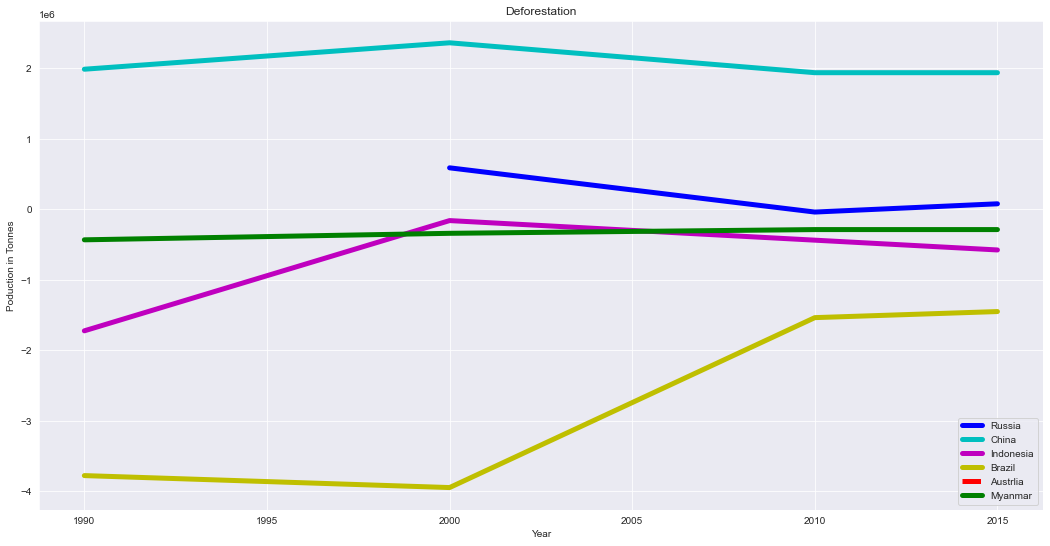

In [77]:
# iterate through the dataframe dictionary to plot
ls_of_style = ['b-', '-c', '-m', '-y', '--r',
                 '-g', ':b', ':r', '--g', ':c']
sns.set_style('darkgrid')
fig, axes = plt.subplots(figsize=(18,9))
axes.set_title('Deforestation')
axes.set_xlabel('Year')
axes.set_ylabel('Poduction in Tonnes')
#axes.set_fillstyle('full')
axes.set
i = 0
for df in dict_of_df:
    axes.plot((dict_of_df[df]['Year']),dict_of_df[df]['Forest_Change'] , ls_of_style[i],
              linewidth=5,
#              fillstyle= 'bottom',
            label = forest_country[i])
    i += 1
axes.legend()

In [78]:
fig.savefig('forest_plt.png')

In [79]:
indexNames1 = df1[df1['Code'].isin(Code)].index
df_palm_country = df1.drop(indexNames1)

In [80]:
df_palm.tail()

,Entity,Code,Year,Tonnes
3463,World,OWID_WRL,2014,57260155
3464,World,OWID_WRL,2015,59800434
3465,World,OWID_WRL,2016,58156889
3466,World,OWID_WRL,2017,65860608
3467,World,OWID_WRL,2018,71453193


In [81]:
df_palm_world = df_palm.loc[df_palm['Entity']=='World']
df_palm_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 3410 to 3467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  58 non-null     object
 1   Code    58 non-null     object
 2   Year    58 non-null     int64 
 3   Tonnes  58 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ KB


In [82]:
dict_of_df = {}
for country in Top_Production_Country:

    key_name = 'df_plot_'+str(country)    

    dict_of_df[key_name] = copy.deepcopy(
        df_palm_country.loc[df_palm_country['Entity']==country])
 



In [83]:
Malaysia_2018 = (dict_of_df_palm['df_plot_Malaysia'].loc[dict_of_df_palm['df_plot_Malaysia']['Year']==2018]['Tonnes']).values[0]
Indonesia_2018 = (dict_of_df_palm['df_plot_Indonesia'].loc[dict_of_df_palm['df_plot_Indonesia']['Year']==2018]['Tonnes']).values[0]
World_2018 = ((df_palm_world.loc[df_palm_world['Year']==2018]['Tonnes']).values[0] - Malaysia_2018 - Indonesia_2018)

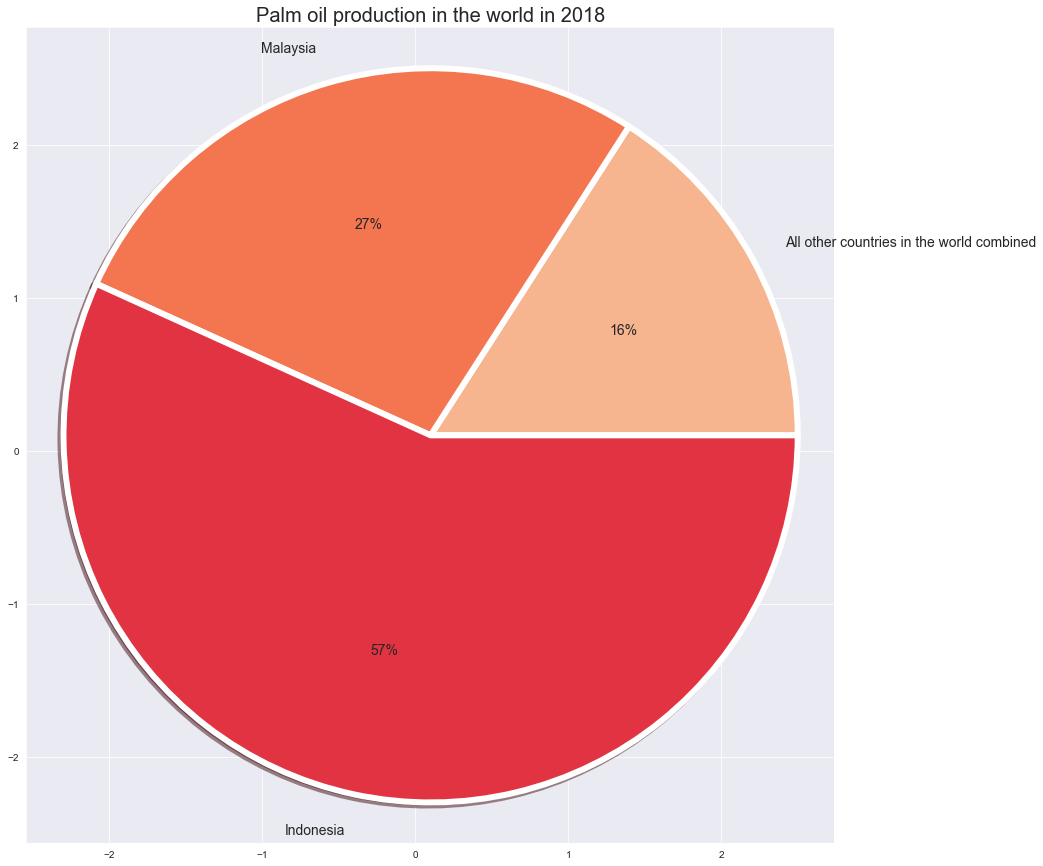

In [40]:
#define data
data = [World_2018,Malaysia_2018, Indonesia_2018]
labels = ['All other countries in the world combined','Malaysia','Indonesia']

plt.subplots(figsize=(15,15))
#define Seaborn color palette to use
colors = sns.color_palette("rocket_r")[0:5]
plt.title("Palm oil production in the world in 2018", fontsize=20)


#create pie chart
plt.pie(data, labels = labels, colors = colors, 
        autopct='%.0f%%', 
        shadow = 'True',
        #startangle = 90,
        radius = 2.4,
        textprops = {'fontsize':14},
        wedgeprops = {'linewidth': 6},
        frame = 'true' ,
        center = (0.1,0.1))

plt.show()



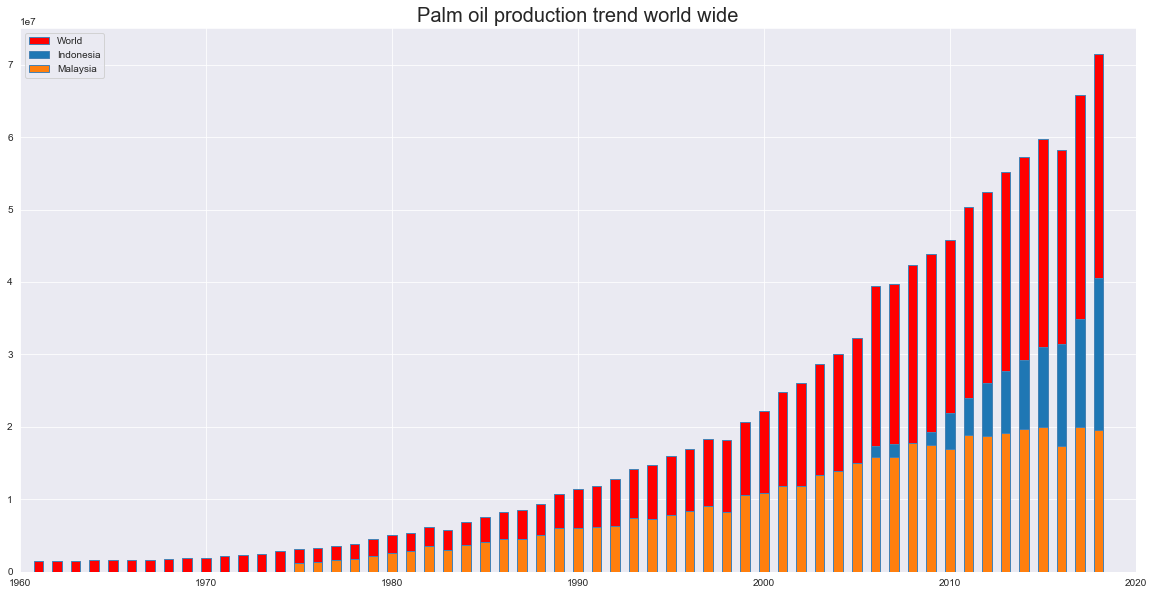

In [41]:
plt.figure(figsize=(20,10))
barWidth = 0.52
plt.title("Palm oil production trend world wide", fontsize=20)
sns.color_palette("cubehelix", as_cmap=True)
plt.bar(df_palm_world['Year'], df_palm_world['Tonnes'], width = barWidth, color='red',edgecolor='steelblue', label="World")
plt.bar(dict_of_df_palm['df_plot_Indonesia']['Year'], dict_of_df_palm['df_plot_Indonesia']['Tonnes'], width = barWidth, 
        #color='blue',
        edgecolor='steelblue', label='Indonesia')
plt.bar(dict_of_df_palm['df_plot_Malaysia']['Year'], dict_of_df_palm['df_plot_Malaysia']['Tonnes'], width = barWidth, 
        #color='green',
        edgecolor='steelblue', label ='Malaysia')
plt.xlim(xmin=1960,xmax=2020)

plt.legend(loc = 0)
plt.show()

In [105]:
## process deforestation data
# make a list of country
ls_forest_country = ['China', 'Indonesia', 'Brazil', 
                     'Myanmar', 'Tanzania', 'Argentina', 'World']

In [106]:
dict_of_df = {}
for country in ls_forest_country:
    key_name = 'df_plot_'+str(country)    
    dict_of_df[key_name] = copy.deepcopy(
        df_forest.loc[df_forest['Entity']==country])

In [107]:
China_2015 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==2015]['Forest_Change']).values[0]
Indonesia_2015 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==2015]['Forest_Change']).values[0]
Myanmar_2015 = (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==2015]['Forest_Change']).values[0]
Brazil_2015 = (dict_of_df['df_plot_Brazil'].loc[dict_of_df['df_plot_Brazil']['Year']==2015]['Forest_Change']).values[0]


China_2010 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==2010]['Forest_Change']).values[0]
Indonesia_2010 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==2000]['Forest_Change']).values[0]
Myanmar_2010 = (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==2010]['Forest_Change']).values[0]
Brazil_2010 = (dict_of_df['df_plot_Brazil'].loc[dict_of_df['df_plot_Brazil']['Year']==2010]['Forest_Change']).values[0]



China_2000 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==2000]['Forest_Change']).values[0]
Indonesia_2000 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==2000]['Forest_Change']).values[0]
Myanmar_2000 = (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==2000]['Forest_Change']).values[0]
Brazil_2000 = (dict_of_df['df_plot_Brazil'].loc[dict_of_df['df_plot_Brazil']['Year']==2000]['Forest_Change']).values[0]


China_1990 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==1990]['Forest_Change']).values[0]
Indonesia_1990 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==1990]['Forest_Change']).values[0]
Myanmar_1990 = (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==1990]['Forest_Change']).values[0]
Brazil_1990 = (dict_of_df['df_plot_Brazil'].loc[dict_of_df['df_plot_Brazil']['Year']==1990]['Forest_Change']).values[0]




In [108]:
ls_forest={ '2015':[China_2015,Indonesia_2015,Myanmar_2015,Brazil_2015],
            '2010':[China_2010,Indonesia_2010,Myanmar_2010,Brazil_2010],
            '2000':[China_2000,Indonesia_2000, Myanmar_2000,Brazil_2000 ],
            '1990':[China_1990,Indonesia_1990, Myanmar_1990,Brazil_1990],
            }

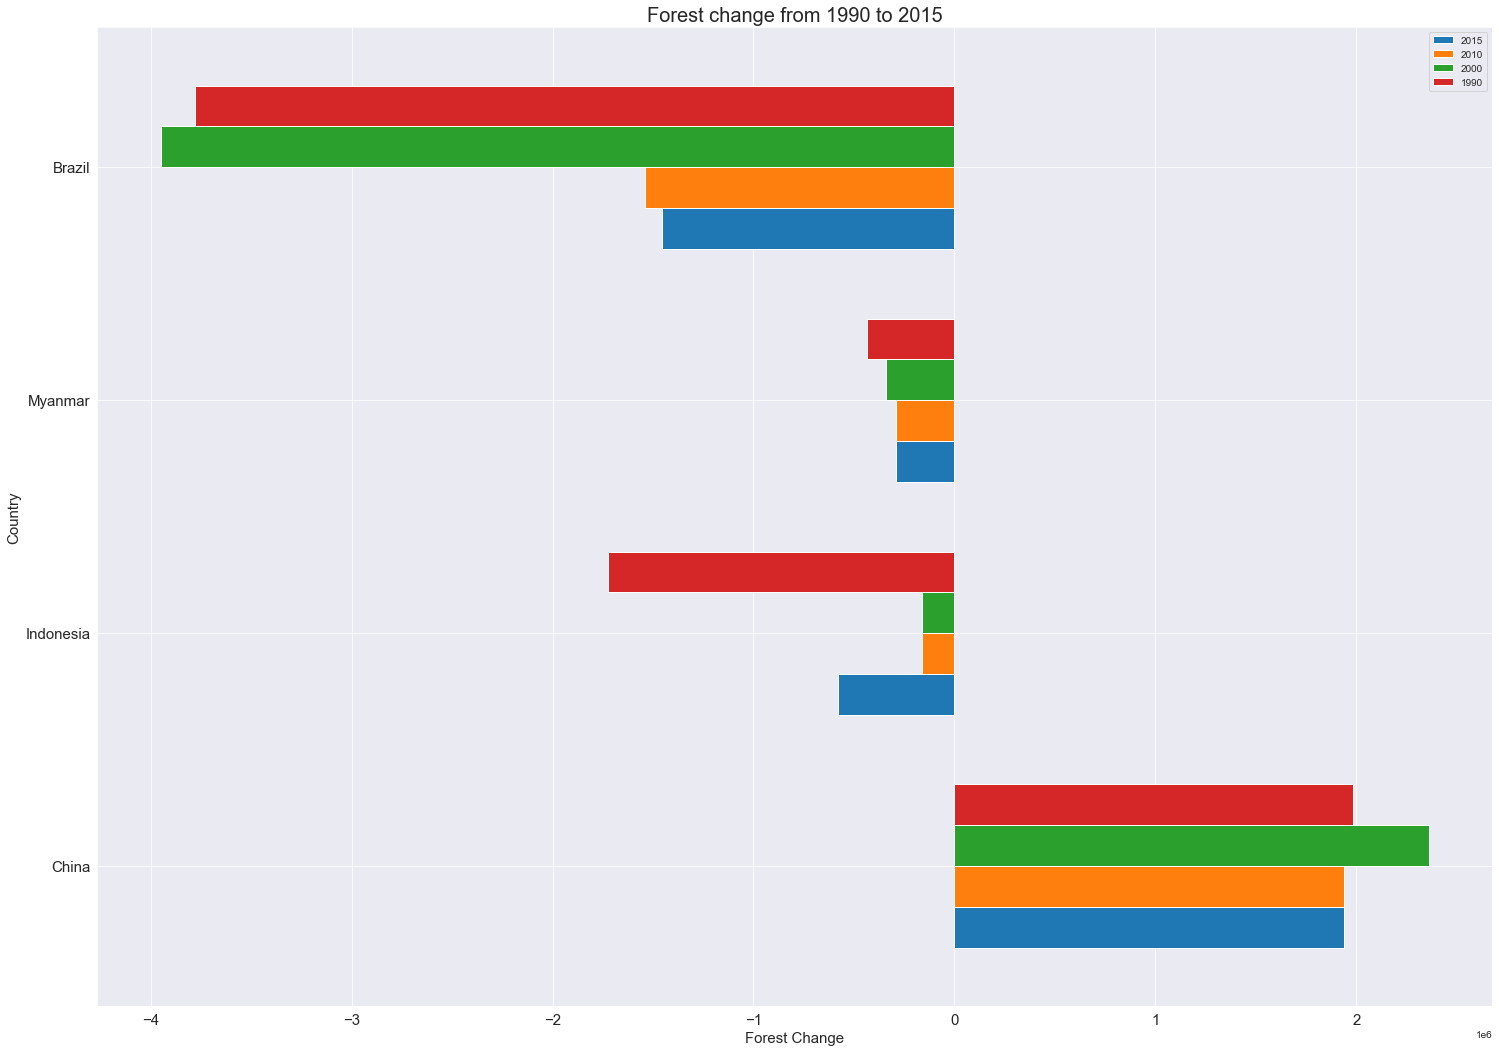

In [111]:
sns.color_palette("crest")
sns.set_style('darkgrid')

df_a = pd.DataFrame(ls_forest,columns=['2015','2010','2000','1990'], 
                    index = ['China','Indonesia','Myanmar','Brazil'])

df_a.plot.barh(fontsize=15,width = 0.7, figsize=(25,18))
plt.ylabel('Country', fontsize=15)
plt.xlabel('Forest Change', fontsize=15)
plt.title("Forest change from 1990 to 2015", fontsize=20)


plt.legend(loc = 0)
plt.show()

In [102]:
sns.color_palette("crest")
sns.set_style('darkgrid')

df_a = pd.DataFrame(ls_forest,columns=['2015','2010','2000','1990'], 
                    index = ['China','Indonesia','Myanmar','Brazil'])

df_a.plot.barh(fontsize=15,width = 0.7, figsize=(25,18))
plt.ylabel('Country', fontsize=15)
plt.xlabel('Forest Change', fontsize=15)
plt.title("Forest change from 1990 to 2015", fontsize=20)


plt.legend(loc = 0)
plt.show()

NameError: name 'ls_forest' is not defined

In [ ]:
# sns.set_style('darkgrid')
# plt.figure(figsize=(20,10))
# plt.xticks(rotation = -45)
# plt.title("Palm oil production trend world wide", fontsize=20)
# sns.countplot(x= df_palm_world['Year'])
# plt.show()

In [ ]:
# year = [2015, 2000, 1990]

# diction1 = {}
# for yr in year:
#     name = 'China_'+str(yr)
#     diction1[name] = (dict_of_df_forest['df_plot_China'].loc[dict_of_df_forest['df_plot_China']['Year']==int(yr)
#                                              ]['Forest_Change']).values[0]

# diction2 = {}
# for yr in year:
#     name = 'Indonesia_'+str(yr)
#     diction2[name] = (dict_of_df_forest['df_plot_Indonesia'].loc[dict_of_df_forest['df_plot_Indonesia']['Year']==int(yr)
#                                              ]['Forest_Change']).values[0]

# diction3 = {}
# for yr in year:
#     name = 'Myanmar_'+str(yr)
#     diction3[name] = (dict_of_df_forest['df_plot_Myanmar'].loc[dict_of_df_forest['df_plot_Myanmar']['Year']==int(yr)
#                                              ]['Forest_Change']).values[0]




In [ ]:
# year = [2015,2000, 1990]


# list_a = []
# number = 10
# for df in dict_of_df_forest:

#   print(([dict_of_df_forest[df]["Year"]== 1990]['Forest_Change']).values[0])


#rint( dict_of_df['df_plot_China'].loc([dict_of_df_forest['df_plot_China']["Year"]== 1990]['Forest_Change']).values[0])



# country=
#     (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==2015]['Forest_Change']).values[0]

 
# for df in dict_of_df_palm:
#     axes.plot((dict_of_df_palm[df]['Year']),dict_of_df_palm[df]['Tonnes'] , ls_style[i], 

#               label = Top_Production_Country[i], linewidth=2.5)
# list_a = []
# number = 0
# for df in dict_of_df_forest:
#     number =(dict_of_df_forest[df].loc[dict_of_df_forest[df]["Year"]== 1990]['Forest_Change']).values[0]
#     list_a.append(int(number))

    
    
# year_1990 = []
# for country in ls_forest_country:
#     item = str(country)+'_1990'
#     year_1990.append(item)
    


# dict_of_forest_year = {}

# for yr in year:
#     keyname = yr
#     dict_of_forest_year[keyname] = year_1990
    
# make a dictionary of deforestation each year

# i = 0
# for country in ls_forest_country:
#     keyname_1 = str(country)+'_1990'
#     dict_of_forest_year['1990'] = keyname_1
#     keyname_2 = 'df_plot_'+str(country)  
#     dict_of_forest_year['1990'] = copy.deepcopy((dict_of_df_forest[keyname_2].loc
#                                                  [dict_of_df_forest[keyname_2]['Year']==1990]['Forest_Change']).values[0])


# dict_of_forest_year
